In [31]:
%matplotlib widget
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [3]:
g = ct.Solution('gri30.yaml')
g()


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  



In [9]:
# set air composition
g.X = {
    "N2": 0.78084,
    "O2": 0.20946,
    "Ar": 0.009340,
    "CO2": 0.000416,
#     "Ne": 0.00001818,
#     "He": 0.00000524,
    "CH4": 0.00000187,
#     "Kr": 0.00000114
}
g.TP = 298, ct.one_atm
g()


  gri30:

       temperature   298 K
          pressure   1.0133e+05 Pa
           density   1.1846 kg/m^3
  mean mol. weight   28.967 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy           -5767.8       -1.6707e+05  J
   internal energy            -91305       -2.6448e+06  J
           entropy              6861        1.9874e+05  J/K
    Gibbs function       -2.0503e+06       -5.9391e+07  J
 heat capacity c_p            1003.3             29061  J/K
 heat capacity c_v            716.22             20746  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.23137           0.20945           -26.237
               CH4        1.0356e-06        1.8699e-06           -65.713
               CO2        0.00063199        0.00041598           -192.32


In [11]:
g.equilibrate('TP')

In [12]:
g()


  gri30:

       temperature   298 K
          pressure   1.0132e+05 Pa
           density   1.1846 kg/m^3
  mean mol. weight   28.967 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy           -5819.6       -1.6857e+05  J
   internal energy            -91357       -2.6463e+06  J
           entropy              6861        1.9874e+05  J/K
    Gibbs function       -2.0504e+06       -5.9393e+07  J
 heat capacity c_p            1003.3             29061  J/K
 heat capacity c_v            716.22             20746  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.23136           0.20944           -26.237
               H2O        2.3259e-06        3.7398e-06           -132.81
               CO2        0.00063483        0.00041785           -192.31


In [13]:
g.viscosity

1.8583896772464103e-05

In [14]:
g.conductivity

AttributeError: 'Solution' object has no attribute 'conductivity'

In [15]:
dir(g)

['CK_mode',
 'DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'Te',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__composition_to_array',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_cinit',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_init_yaml',
 '_native_state',
 '_partial_states',
 '_references',
 'activities',
 'activity_coefficients'

In [17]:
g.cp / g.cv

1.4007655037855316

In [24]:
g.thermal_conductivity

0.026250712996857575

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
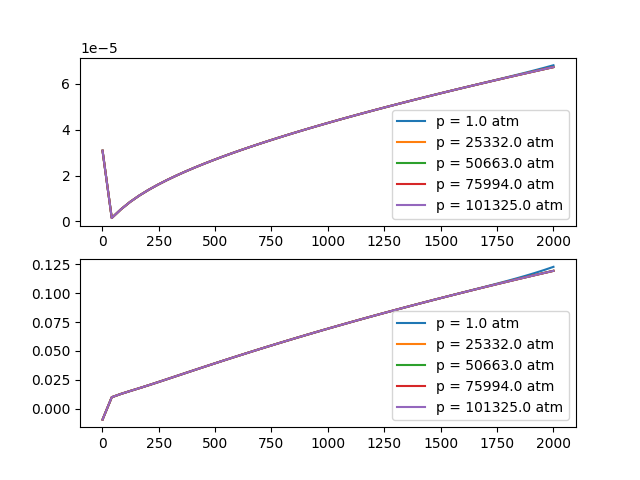

In [36]:
T = np.linspace(1, 2000)
P = np.linspace(1, ct.one_atm, 5)
g = ct.Solution('gri30.yaml')
g.X = {
    "N2": 0.78084,
    "O2": 0.20946,
    "Ar": 0.009340,
    "CO2": 0.000416,
    "CH4": 0.00000187
}
f = plt.figure()
ax1 = f.add_subplot(2, 1, 1)
ax2 = f.add_subplot(2, 1, 2)
for p in P:
    mu = []
    k = []
    for t in T:
        g.TP = t, p
        g.equilibrate('TP')
        mu.append(g.viscosity)
        k.append(g.thermal_conductivity)
    ax1.plot(T, mu, label="p = {} atm".format(p))
    ax2.plot(T, k, label="p = {} atm".format(p))
ax1.legend()
ax2.legend()
plt.show()
        
    

In [37]:
help(g.equilibrate)

Help on built-in function equilibrate:

equilibrate(...) method of cantera.composite.Solution instance
    ThermoPhase.equilibrate(self, XY, solver=u'auto', double rtol=1e-9, int max_steps=1000, int max_iter=100, int estimate_equil=0, int log_level=0)
    
    Set to a state of chemical equilibrium holding property pair
    *XY* constant.
    
    :param XY:
        A two-letter string, which must be one of the set::
    
            ['TP','TV','HP','SP','SV','UV']
    
    :param solver:
        Specifies the equilibrium solver to use. May be one of the following:
    
        * ``'element_potential'`` - a fast solver using the element potential
          method
        * ``'gibbs'`` - a slower but more robust Gibbs minimization solver
        * ``'vcs'`` - the VCS non-ideal equilibrium solver
        * ``'auto'`` - The element potential solver will be tried first, then
          if it fails the Gibbs solver will be tried.
    :param rtol:
        The relative error tolerance.
    :pa

In [38]:
ct.__version__

'2.6.0a4'